# Bland-Altman plot 
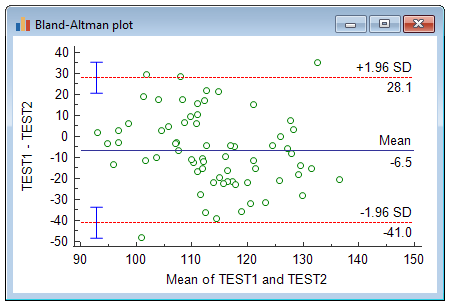

In [4]:
import json

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False  # https://stackoverflow.com/questions/43102564/matplotlib-negative-numbers-on-tick-labels-displayed-as-boxes
plt.style.use('seaborn-ticks')  # 'seaborn-ticks'
import numpy as np
import seaborn as sns 

from scipy.stats import variation

In [2]:
# colors and class-superclass maps
with open(r'..\data\metadata\color_schemes.json') as infile:
    colors = json.load(infile, parse_int=True)
    
data = pd.read_excel(r'../data/processed/combined_metabolites_data.xlsx').set_index('i')
data_cols = data.filter(regex='_FBG|_RBG').columns
fbg_cols = data.filter(regex='_FBG').columns
rbg_cols = data.filter(regex='_RBG').columns

ap = pd.read_excel(r'..\data\metadata\animal_phenotypes.xlsx', index_col=0)
fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)


# Horizontal connected-dot plot between molecular classes 
## each class on Y-axis
## X-axis = difference between average of the standard deviations of the 3 measurements taken on each mouse across the 3 weeks

# Average of RSDs

In [3]:
df = data.loc[:, data_cols].T.copy()
df = np.power(2, df)
# display(df)
(df
 .join(fg[['animal', 'bg_type', 'week']])
 .groupby(['animal', 'bg_type', 'week'])
 .transform(lambda x: (x - x.std()) / x.mean())
)

KeyboardInterrupt: 

In [ ]:
df = data.loc[:, data_cols].T.copy()
df = np.power(2, df)
df = (df
    .join(fg[['animal', 'bg_type']])
#     .groupby('animal')
    .groupby(['animal', 'bg_type'])
#     .agg(lambda x: np.std(x)/np.mean(x))
    .transform(lambda x: (x - x.std()) / x.mean())
     )
df

In [12]:
# df = data.loc[(data['Type'] == )]
df = data.loc[:, data_cols].T.copy()
df = np.power(2, df)
df = (df
    .join(fg[['animal', 'bg_type']])
#     .groupby('animal')
    .groupby(['animal', 'bg_type'])
#     .agg(lambda x: np.std(x)/np.mean(x))
    .transform(lambda x: (x - x.std()) / x.mean())
     )
df

,m_0,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_9,m_10,...,l_863,l_864,l_865,l_866,l_867,l_868,l_869,l_870,l_871,l_872
1102_8_RBG,-0.115579,0.984650,0.099098,0.966677,-0.805372,0.984388,0.939405,1.011382,0.909433,0.930466,...,0.513418,0.492609,0.507622,-0.052802,0.598196,0.761738,0.510996,0.152843,0.225687,0.610629
1093_9_RBG,0.175024,0.985848,1.058787,0.953716,0.788415,0.818758,0.944323,0.904269,0.918048,0.869548,...,1.030650,1.029396,1.031570,1.096244,1.042385,1.012967,1.049845,0.638426,0.700048,0.503281
1060_8_FBG,-1.212688,0.783906,0.668581,0.929041,-1.717012,0.633703,0.648782,0.746031,0.563488,0.889050,...,0.779137,0.987113,0.620901,0.781083,0.834934,0.642748,0.532984,0.780010,0.777784,0.681927
1060_8_RBG,-0.493784,0.860007,0.770836,1.012348,-0.878838,0.837962,0.823362,0.615517,0.883086,0.964774,...,0.906353,0.850279,0.872282,1.040633,0.866932,0.942109,0.656329,0.699079,0.800335,0.697269
1060_9_FBG,1.205858,1.012291,0.973282,0.799858,-1.708464,1.026784,0.883736,0.762948,0.859333,1.010727,...,0.765084,0.402354,0.775805,0.518958,0.641861,0.962609,0.910524,0.908758,0.929481,0.999471
1060_9_RBG,1.144091,0.415744,-0.717080,0.754359,0.800146,0.772302,0.777101,0.590813,0.767573,0.841102,...,0.967102,0.948574,0.970081,0.530788,0.977094,0.936460,1.033385,0.976829,0.979579,0.943461
1060_10_FBG,-1.044165,0.852071,0.217674,0.985546,1.266049,0.719449,0.969436,1.023826,0.959483,0.857562,...,-0.161611,-0.257467,-0.520403,-0.740674,-0.302086,0.122359,-0.297476,0.230417,0.289522,0.361217
1060_10_RBG,-0.923983,0.909007,0.542389,0.838636,0.431477,1.014299,1.017268,1.038587,1.000279,0.972718,...,0.690588,0.508970,0.626396,0.331897,0.639500,0.690580,0.662404,0.294122,0.511362,0.164095
1062_8_FBG,1.055668,1.005327,1.010420,0.997313,-1.562075,1.010424,0.915708,1.002838,0.827449,0.951757,...,0.106000,0.286324,0.168559,-0.234531,0.109834,0.412098,-0.301927,0.595059,0.616245,0.787171
1062_8_RBG,1.017995,0.962212,0.530140,0.898916,0.488253,0.557909,0.916706,0.612261,0.864560,0.907197,...,1.042652,1.026674,1.050245,1.055396,1.049037,1.023888,0.987269,1.056771,1.070362,1.046494


In [4]:
lipids = lipids.loc[(data_exp2['Type'] == 'lipid') & (data_exp2['ID'] != 'unknown')]

rbgs = []
fbgs = []

for animal in animals_used:
    rbg_files = fg.loc[(fg['bg_type'] == 'RBG') & (fg['animal'] == animal)].index
    fbg_files = fg.loc[(fg['bg_type'] == 'FBG') & (fg['animal'] == animal)].index
    rbg_std_avgs = ((lipids.loc[:, rbg_files].std(axis=1) / lipids.loc[:, rbg_files].mean(axis=1)) * 100) \
                         .to_frame() \
                         .join(lipids['molec_class']) \
                         .groupby('molec_class') \
                         .mean()
    fbg_std_avgs = ((lipids.loc[:, fbg_files].std(axis=1) / lipids.loc[:, fbg_files].mean(axis=1)) * 100) \
                         .to_frame() \
                         .join(lipids['molec_class']) \
                         .groupby('molec_class') \
                         .mean()
    rbgs.append(rbg_std_avgs)
    fbgs.append(fbg_std_avgs)
rbgs = pd.concat(rbgs, axis=1).std(axis=1)
fbgs = pd.concat(fbgs, axis=1).std(axis=1)
result = pd.concat([rbgs, fbgs], axis=1)
result.columns = ['RBG', 'FBG']
# result[['RBG', 'FBG']] = result[['RBG', 'FBG']] * 100
result['superclass'] = result.index.map(lambda x: colors[x]['superclass'])
result['n'] = result.index.map(lipids['molec_class'].value_counts())
result['yticklabel'] = result.index + '  n=' + result['n'].astype('str')
result['rbg_better'] = result['RBG'] < result['FBG']
result = result.sort_values(['rbg_better', 'RBG'], ascending=[True, True])
result['y_index'] = range(len(result))
result['max_x'] = result[['RBG', 'FBG']].max(axis=1)
result['diff'] = round(result['FBG'] - result['RBG'], 1)
result['diff'] = result['diff'].apply(lambda x: f'+{str(x)}%' if x > 0 else f'‒{str(x)[1:]}%')
result

,RBG,FBG,superclass,n,yticklabel,rbg_better,y_index,max_x,diff
molec_class,,,,,,,,,
AC,13.053975,10.710892,Fatty Acyl,3,AC n=3,False,0,13.053975,‒2.3%
PE,14.768111,11.227090,Phospholipid,6,PE n=6,False,1,14.768111,‒3.5%
TG,16.510718,15.990223,Glycerolipid,107,TG n=107,False,2,16.510718,‒0.5%
PC,4.146632,8.490838,Phospholipid,62,PC n=62,True,3,8.490838,+4.3%
SM,4.591892,9.993919,Sphingolipid,24,SM n=24,True,4,9.993919,+5.4%
Plasmanyl-PC,5.327906,12.267676,Phospholipid,27,Plasmanyl-PC n=27,True,5,12.267676,+6.9%
Plasmenyl-PE,5.406812,16.630533,Phospholipid,18,Plasmenyl-PE n=18,True,6,16.630533,+11.2%
Plasmanyl-PE,5.730304,16.861068,Phospholipid,10,Plasmanyl-PE n=10,True,7,16.861068,+11.1%
Plasmenyl-PC,6.570133,15.763704,Phospholipid,12,Plasmenyl-PC n=12,True,8,15.763704,+9.2%


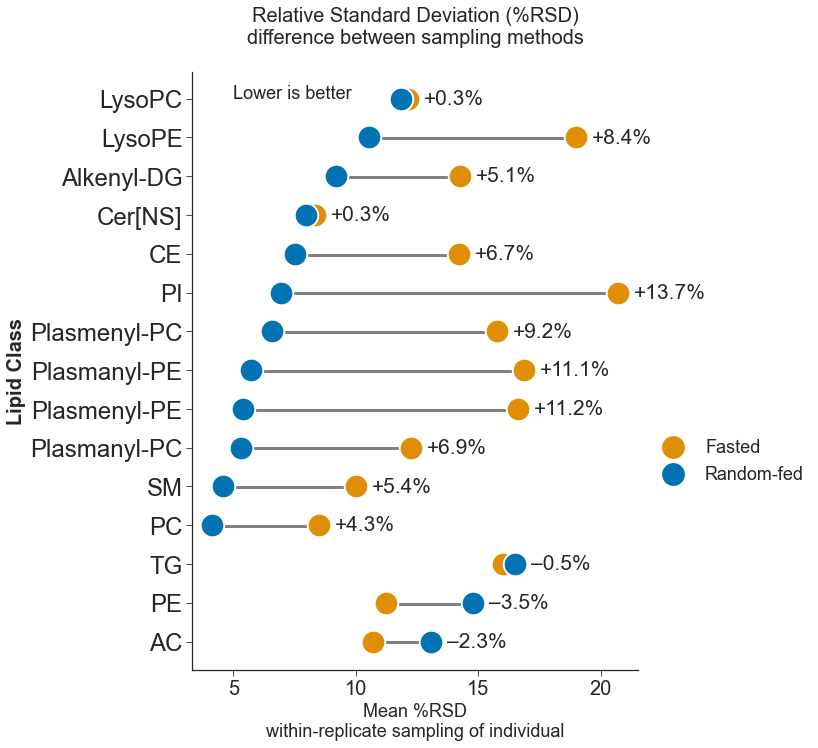

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 11)

sns.scatterplot(data=result, x='FBG', y='y_index', 
                color=colors['FBG'], 
                s=555,
#                 size='n', sizes=(55, 400),
                label='Fasted', zorder=3,
                ax=ax)
sns.scatterplot(data=result, x='RBG', y='y_index', 
                color=colors['RBG'], 
                s=555,
#                 size='n', sizes=(55, 400),
                label='Random-fed', zorder=5,
                ax=ax)
plt.hlines(y=result['y_index']-0.02, xmin=result['RBG'], xmax=result['FBG'], 
           color='gray', alpha=1, linewidth=3, zorder=0)

# add text of difference between
for i, row in result.iterrows():
    plt.annotate(text=row['diff'],
                 xy=(row['max_x'] + 0.65, row['y_index']), 
                 ha='left', va='center', fontsize=21)
# for i, row in result.iterrows():
#     plt.text(x=-0.2, y=row['y_index'], s='n = '+str(row['n']), fontsize=18, ha='right')
# plt.annotate('Lower is better', xy=(5, 15), fontsize=17, ha='right')  # ← 
plt.text(s='Lower is better', x=5, y=14, fontsize=18, ha='left')

plt.yticks(ticks=result['y_index'], labels=result.index, fontsize=24);
plt.xticks(ticks=[5, 10, 15, 20], fontsize=20)
plt.ylabel('Lipid Class', fontsize=20, fontweight='bold')
plt.xlabel('Mean %RSD\nwithin-replicate sampling of individual', fontsize=18)
plt.title('Relative Standard Deviation (%RSD)\ndifference between sampling methods\n', fontsize=20)

# handles, labels = ax.get_legend_handles_labels()
# handles = [handles[0]] + [handles[6]] + handles[1:6]
# labels = [labels[0]] + [labels[6]] + labels[1:6]
plt.legend(
#     handles=handles, labels=labels,
    loc=(1.02, 0.3), markerscale=1.05, fontsize=18)

sns.despine()
plt.savefig(r'../reports/figures/4-4-2/avg_std_diff_RSD.png',
            facecolor='white',
            dpi=300,
            bbox_inches='tight')
plt.savefig(r'../reports/figures/4-4-2/avg_std_diff_RSD.svg',
            facecolor='white',
            dpi=300,
            bbox_inches='tight')

# Average of std. dev. only

In [292]:
lipids = lipids.loc[(data['Type'] == 'lipid') & (data['ID'] != 'unknown')]

rbgs = []
fbgs = []

for animal in animals_used:
    rbg_files = fg.loc[(fg['bg_type'] == 'RBG') & (fg['animal'] == animal)].index
    fbg_files = fg.loc[(fg['bg_type'] == 'FBG') & (fg['animal'] == animal)].index
    rbg_std_avgs = lipids.loc[:, rbg_files] \
                         .std(axis=1) \
                         .to_frame() \
                         .join(lipids['molec_class']) \
                         .groupby('molec_class') \
                         .mean()
    fbg_std_avgs = lipids.loc[:, fbg_files] \
                         .std(axis=1) \
                         .to_frame() \
                         .join(lipids['molec_class']) \
                         .groupby('molec_class') \
                         .mean()
    rbgs.append(rbg_std_avgs)
    fbgs.append(fbg_std_avgs)
rbgs = pd.concat(rbgs, axis=1).std(axis=1)
fbgs = pd.concat(fbgs, axis=1).std(axis=1)
result = pd.concat([rbgs, fbgs], axis=1)
result.columns = ['RBG', 'FBG']
result['superclass'] = result.index.map(lambda x: colors[x]['superclass'])
result['rbg_better'] = result['RBG'] < result['FBG']
result = result.sort_values(['rbg_better', 'RBG'], ascending=[True, True])
result['y_index'] = range(len(result))
result['max_x'] = result[['RBG', 'FBG']].max(axis=1)
result['diff'] = round(result['FBG'] - result['RBG'], 2)
result['diff'] = result['diff'].apply(lambda x: '+' + str(x) if x > 0 else '‒' + str(x)[1:])
result

,RBG,FBG,superclass,rbg_better,y_index,max_x,diff
molec_class,,,,,,,
Cer[NS],5.856391e+05,2.907200e+05,Sphingolipid,False,0,5.856391e+05,‒294919.15
PE,5.973061e+05,3.641313e+05,Phospholipid,False,1,5.973061e+05,‒233174.77
TG,1.953617e+07,8.505215e+06,Glycerolipid,False,2,1.953617e+07,‒11030957.53
LysoPC,1.970097e+07,1.705478e+07,Phospholipid,False,3,1.970097e+07,‒2646181.36
Plasmanyl-PE,1.580405e+05,3.288252e+05,Phospholipid,True,4,3.288252e+05,+170784.7
AC,2.267578e+05,6.697816e+05,Fatty Acyl,True,5,6.697816e+05,+443023.77
LysoPE,2.360831e+05,3.321805e+05,Phospholipid,True,6,3.321805e+05,+96097.42
Plasmenyl-PC,3.290281e+05,4.557615e+05,Phospholipid,True,7,4.557615e+05,+126733.43
Plasmenyl-PE,3.758218e+05,5.390165e+05,Phospholipid,True,8,5.390165e+05,+163194.68


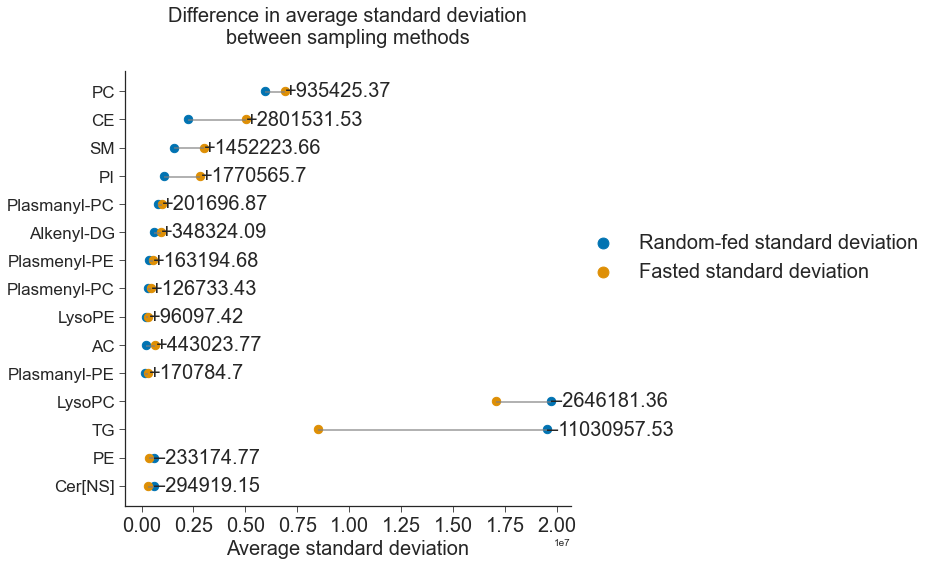

In [293]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)


plt.scatter(result['RBG'], result['y_index'], 
            color=colors['RBG'], 
            alpha=1, s=70, 
            label='Random-fed standard deviation')
plt.scatter(result['FBG'], result['y_index'], 
            color=colors['FBG'], 
            alpha=1, s=70,
            label='Fasted standard deviation')
plt.hlines(y=result['y_index']-0.03, xmin=result['RBG'], xmax=result['FBG'], color='grey', alpha=0.8)

# add text of difference between
for i, row in result.iterrows():
    plt.annotate(text=row['diff'],
                 xy=(row['max_x'] + 0.008, row['y_index']), 
                 ha='left', va='center', fontsize=20)

plt.annotate('Lower is better', xy=(0.08, 15), fontsize=17)  # ← 
    
plt.legend(loc=(1.01, 0.5), markerscale=1.3, fontsize=20)

plt.yticks(ticks=result['y_index'], labels=result.index, fontsize=17);
plt.xticks(fontsize=20)
plt.xlabel('Average standard deviation', fontsize=20)
plt.title('Difference in average standard deviation\nbetween sampling methods\n', fontsize=20)

sns.despine()
# plt.tight_layout()
plt.savefig(r'../reports/figures/4-4-2/avg_std_diff_STD.png',
            facecolor='white',
            dpi=300,
            bbox_inches='tight')